In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [ ]:
pip install missingno

In [2]:
dfa = pd.read_excel("earthquake_data.xlsx")

In [3]:
dfa

,id,flag_tsunami,year,month,day,hour,minute,second,focal_depth,eq_primary,...,longitude,region_code,injuries,injuries_description,damage_millions_dollars,damage_description,total_injuries,total_injuries_description,total_damage_millions_dollars,total_damage_description
0,338,No,1048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,771,Tsu,1580,4.0,6.0,NaN,NaN,NaN,33.0,6.2,...,1.309,120,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
2,7889,Tsu,1757,7.0,15.0,NaN,NaN,NaN,NaN,NaN,...,-6.320,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6697,Tsu,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6013,Tsu,1668,4.0,13.0,NaN,NaN,NaN,NaN,NaN,...,-71.050,150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6067,5360,Tsu,1993,8.0,8.0,8.0,34.0,24.9,59.0,7.8,...,144.801,170,48.0,1.0,250.0,4.0,48.0,1.0,250.0,4.0
6068,5009,No,1983,12.0,22.0,1.0,2.0,2.4,26.0,6.4,...,151.868,170,NaN,NaN,25.0,4.0,NaN,NaN,25.0,4.0
6069,10307,No,2018,2.0,25.0,17.0,44.0,43.0,23.0,7.5,...,142.768,170,300.0,3.0,61.0,4.0,300.0,3.0,61.0,4.0
6070,5498,No,1998,7.0,9.0,5.0,19.0,7.3,10.0,6.2,...,-28.626,130,100.0,2.0,72.0,4.0,100.0,2.0,72.0,4.0


In [5]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6072 entries, 0 to 6071
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             6072 non-null   int64  
 1   flag_tsunami                   6072 non-null   object 
 2   year                           6072 non-null   int64  
 3   month                          5667 non-null   float64
 4   day                            5515 non-null   float64
 5   hour                           4044 non-null   float64
 6   minute                         3838 non-null   float64
 7   second                         2721 non-null   float64
 8   focal_depth                    3120 non-null   float64
 9   eq_primary                     4286 non-null   float64
 10  eq_mag_mw                      1216 non-null   float64
 11  eq_mag_ms                      2916 non-null   float64
 12  eq_mag_mb                      1786 non-null   f

In [6]:
dfa.describe()

,id,year,month,day,hour,minute,second,focal_depth,eq_primary,eq_mag_mw,...,longitude,region_code,injuries,injuries_description,damage_millions_dollars,damage_description,total_injuries,total_injuries_description,total_damage_millions_dollars,total_damage_description
count,6072.000000,6072.000000,5667.000000,5515.000000,4044.000000,3838.000000,2721.000000,3120.000000,4286.000000,1216.000000,...,6022.000000,6072.000000,1169.000000,1349.000000,478.000000,4327.000000,1184.000000,1357.000000,418.000000,3148.000000
mean,4658.426219,1802.307477,6.510852,15.734361,11.308605,28.855915,29.740243,41.680769,6.471419,6.526563,...,37.985633,109.844368,2293.579127,1.975537,1715.606259,2.263693,2510.967061,1.973471,1978.743206,2.193139
std,2924.650010,377.924931,3.450167,8.752862,7.033485,17.151545,17.132196,71.258782,1.043968,0.937869,...,86.726852,53.963219,27095.202227,1.084074,12157.409978,0.956053,28273.298405,1.082526,12988.187606,1.041035
min,1.000000,-2150.000000,1.000000,1.000000,0.000000,0.000000,0.100000,0.000000,1.600000,3.600000,...,-179.984000,10.000000,1.000000,1.000000,0.013000,1.000000,1.000000,1.000000,0.010000,1.000000
25%,2142.750000,1818.000000,4.000000,8.000000,5.000000,14.000000,14.800000,11.000000,5.700000,5.800000,...,-8.000000,50.000000,10.000000,1.000000,3.625000,1.000000,10.000000,1.000000,4.310000,1.000000
50%,4608.500000,1927.000000,7.000000,16.000000,11.000000,30.000000,29.700000,26.000000,6.500000,6.500000,...,43.300000,130.000000,42.000000,2.000000,20.900000,2.000000,42.500000,2.000000,28.000000,2.000000
75%,6475.250000,1986.000000,9.000000,23.000000,17.000000,44.000000,44.500000,40.000000,7.300000,7.200000,...,115.500000,160.000000,200.000000,3.000000,204.350000,3.000000,200.000000,3.000000,300.000000,3.000000
max,10378.000000,2018.000000,12.000000,31.000000,23.000000,59.000000,59.900000,675.000000,9.500000,9.500000,...,180.000000,170.000000,799000.000000,4.000000,220000.000000,4.000000,799000.000000,4.000000,220085.456000,4.000000


In [7]:
dfa

,id,flag_tsunami,year,month,day,hour,minute,second,focal_depth,eq_primary,...,longitude,region_code,injuries,injuries_description,damage_millions_dollars,damage_description,total_injuries,total_injuries_description,total_damage_millions_dollars,total_damage_description
0,338,No,1048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,771,Tsu,1580,4.0,6.0,NaN,NaN,NaN,33.0,6.2,...,1.309,120,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
2,7889,Tsu,1757,7.0,15.0,NaN,NaN,NaN,NaN,NaN,...,-6.320,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6697,Tsu,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6013,Tsu,1668,4.0,13.0,NaN,NaN,NaN,NaN,NaN,...,-71.050,150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6067,5360,Tsu,1993,8.0,8.0,8.0,34.0,24.9,59.0,7.8,...,144.801,170,48.0,1.0,250.0,4.0,48.0,1.0,250.0,4.0
6068,5009,No,1983,12.0,22.0,1.0,2.0,2.4,26.0,6.4,...,151.868,170,NaN,NaN,25.0,4.0,NaN,NaN,25.0,4.0
6069,10307,No,2018,2.0,25.0,17.0,44.0,43.0,23.0,7.5,...,142.768,170,300.0,3.0,61.0,4.0,300.0,3.0,61.0,4.0
6070,5498,No,1998,7.0,9.0,5.0,19.0,7.3,10.0,6.2,...,-28.626,130,100.0,2.0,72.0,4.0,100.0,2.0,72.0,4.0


In [9]:
dfa.isna().sum()

id                                  0
flag_tsunami                        0
year                                0
month                             405
day                               557
hour                             2028
minute                           2234
second                           3351
focal_depth                      2952
eq_primary                       1786
eq_mag_mw                        4856
eq_mag_ms                        3156
eq_mag_mb                        4286
intensity                        3324
country                             0
state                            5764
location_name                       1
latitude                           54
longitude                          50
region_code                         0
injuries                         4903
injuries_description             4723
damage_millions_dollars          5594
damage_description               1745
total_injuries                   4888
total_injuries_description       4715
total_damage

In [11]:
list(dfa.columns)

['id',
 'flag_tsunami',
 'year',
 'month',
 'day',
 'hour',
 'minute',
 'second',
 'focal_depth',
 'eq_primary',
 'eq_mag_mw',
 'eq_mag_ms',
 'eq_mag_mb',
 'intensity',
 'country',
 'state',
 'location_name',
 'latitude',
 'longitude',
 'region_code',
 'injuries',
 'injuries_description',
 'damage_millions_dollars',
 'damage_description',
 'total_injuries',
 'total_injuries_description',
 'total_damage_millions_dollars',
 'total_damage_description']

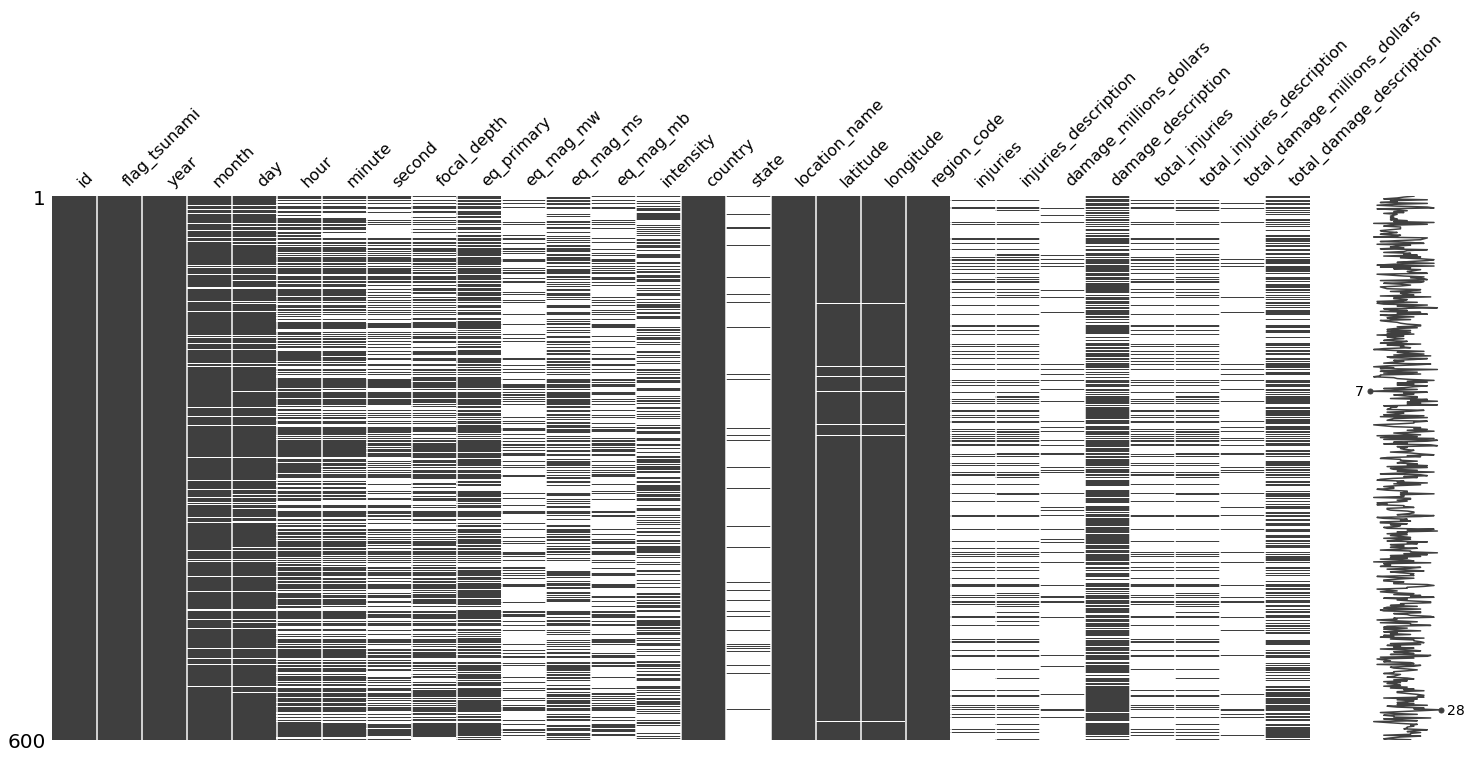

In [16]:
msno.matrix(dfa.sample(600))
plt.show()

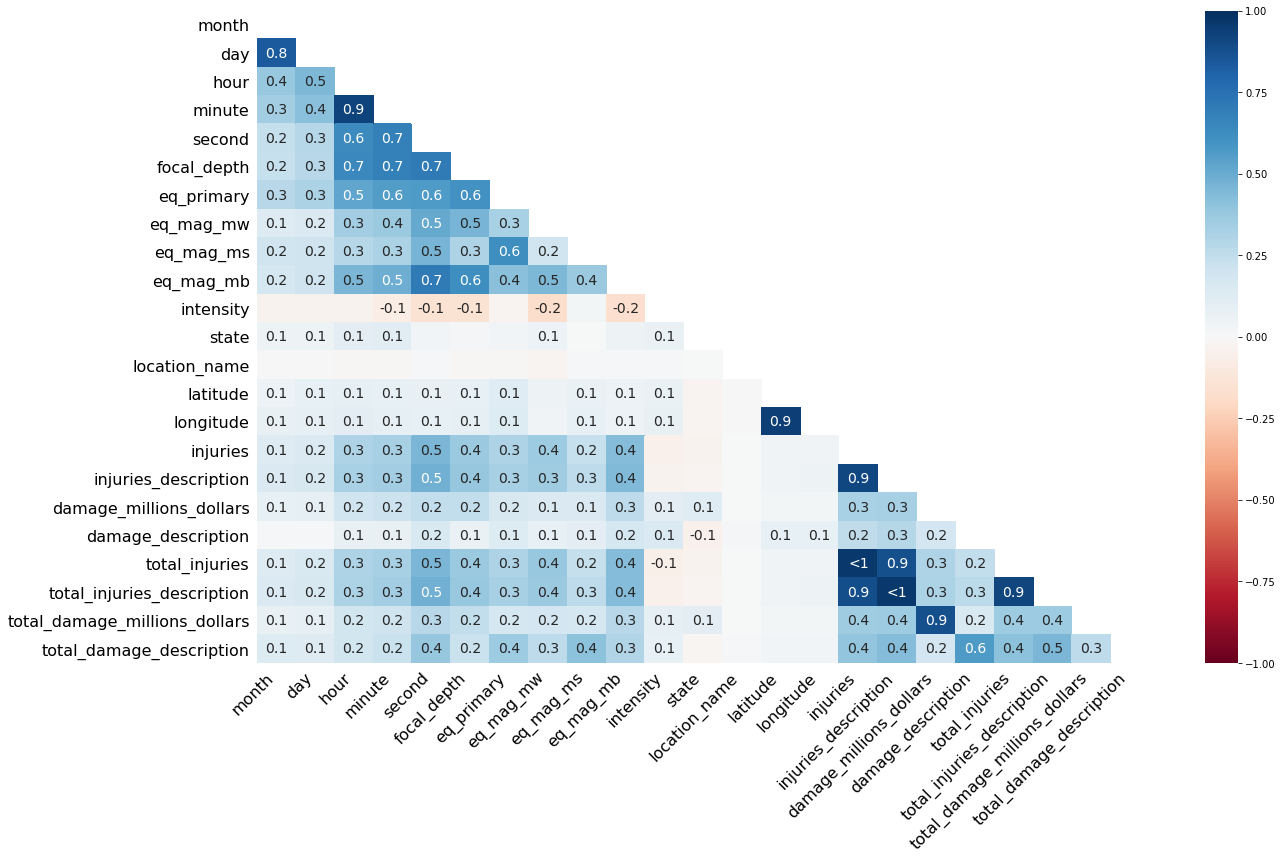

In [15]:
msno.heatmap(dfa)
plt.show()

In [17]:
time_cols = ['year','month','day','hour','minute','second']

In [18]:
dfb = dfa.copy()

In [20]:
dfb[time_cols] = dfb[time_cols].fillna(0)

In [21]:
# scikit-learn

In [22]:
description_cols = [ 'injuries_description','damage_description', 'total_injuries_description', 'total_damage_description']

In [23]:
from sklearn.impute import SimpleImputer

In [25]:
obji = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')

# strategy --> mean, median, most_frequent (mode), constant 

dfa[time_cols] = obji.fit_transform(dfa[time_cols])

# if data == text

ValueError: 'fill_value'=NA is invalid. Expected a numerical value when imputing numerical data

In [26]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6072 entries, 0 to 6071
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             6072 non-null   int64  
 1   flag_tsunami                   6072 non-null   object 
 2   year                           6072 non-null   int64  
 3   month                          5667 non-null   float64
 4   day                            5515 non-null   float64
 5   hour                           4044 non-null   float64
 6   minute                         3838 non-null   float64
 7   second                         2721 non-null   float64
 8   focal_depth                    3120 non-null   float64
 9   eq_primary                     4286 non-null   float64
 10  eq_mag_mw                      1216 non-null   float64
 11  eq_mag_ms                      2916 non-null   float64
 12  eq_mag_mb                      1786 non-null   f

In [28]:
obji = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')

dfa[['state']] = obji.fit_transform(dfa[['state']])

In [29]:
dfa['damage_description'].value_counts()

2.0    1461
3.0    1309
1.0    1094
4.0     463
Name: damage_description, dtype: int64

In [31]:
dfa[['damage_description', 'damage_millions_dollars']].groupby('damage_description').mean()

,damage_millions_dollars
damage_description,
1.0,0.417211
2.0,3.078840
3.0,13.818806
4.0,3574.998799
